In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [28]:
nubb_meta = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
nubb_meta_5percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_5percent_reco.h5", "meta")
nubb_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_0.25percent_reco.h5", "meta")
display(nubb_meta)
display(nubb_meta_5percent)


Tl_meta = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "meta")
Tl_meta_5percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_5percent_reco.h5", "meta")
Tl_meta_025percent = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_0.25percent_reco.h5", "meta")
display(Tl_meta)
display(Tl_meta_5percent)

,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,14,111,3339.136,2.457110,0.625530,0.545402,2.199838,2.334565,Primary
0,126,0,1,35,64,3483.548,2.437890,0.598350,0.569433,1.835691,2.562163,Primary
0,126,1,0,0,0,0.000,0.022494,0.022494,0.022494,1.000000,1.000000,Brem
0,127,0,1,117,118,2858.363,2.300101,0.549494,0.508871,2.774625,1.925596,Primary
0,127,1,0,0,0,0.000,0.029537,0.029537,0.029537,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1308,1,0,15,15,0.000,0.030157,0.030157,0.030157,1.000000,1.000000,Brem
0,1308,2,0,20,20,0.000,0.060066,0.060066,0.060066,1.000000,1.000000,Brem
0,1308,3,0,63,63,0.000,0.030281,0.030281,0.030281,1.000000,1.000000,Brem
0,1309,0,1,22,91,3501.699,2.434517,0.541880,0.518965,3.003698,1.610181,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,12,106,3483.931,2.455894,0.575534,0.530745,2.941261,3.754526,Primary
0,126,0,1,27,52,3517.958,2.439675,0.604798,0.600978,1.636261,2.358098,Primary
0,126,1,0,0,0,0.000,0.021725,0.021725,0.021725,1.000000,1.000000,Brem
0,127,0,1,91,93,2908.763,2.129006,0.542649,0.491462,1.849702,2.066559,Primary
0,127,1,0,10,6,52.707,0.174468,0.174468,0.174468,1.000000,1.000000,Delta0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1308,1,0,7,14,213.580,0.061206,0.061206,0.061206,1.000000,1.000000,Delta0
0,1308,2,0,58,37,108.342,0.029462,0.029462,0.029462,1.000000,1.000000,Delta0
0,1308,3,0,9,9,0.000,0.028966,0.028966,0.028966,1.000000,1.000000,Brem
0,1309,0,1,23,91,3691.758,2.438882,0.512294,0.501778,1.711246,3.486164,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,126000,0,1,82,120,68.675,2.049274,0.590786,0.261863,2.865280,1.038937,Primary
0,126000,1,0,52,52,0.000,0.029735,0.029735,0.029735,1.000000,1.000000,Brem
0,126000,2,0,137,139,68.675,0.165912,0.165912,0.165912,1.256059,1.256059,Brem
0,126000,3,0,132,134,22.235,0.090594,0.090594,0.090594,1.008913,1.008913,Brem
0,126000,4,0,135,136,22.235,0.143344,0.143344,0.143344,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,360057,3,0,144,146,32.627,0.141137,0.141137,0.141137,1.135385,1.135385,Brem
0,360058,0,1,0,66,53.973,2.133792,0.515394,0.341149,2.256718,1.022118,Primary
0,360058,1,0,146,149,53.973,0.184785,0.184785,0.184785,1.069090,1.069090,Brem
0,360059,0,1,45,48,2346.758,2.022291,0.613205,0.243065,3.258269,1.040130,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,126000,0,1,73,106,78.122,2.043446,0.570747,0.223770,2.427135,1.237500,Primary
0,126000,1,0,127,130,78.122,0.166780,0.166780,0.166780,1.547106,1.547106,Brem
0,126000,2,0,119,120,53.123,0.088214,0.088214,0.088214,1.729772,1.729772,Brem
0,126000,3,0,123,126,53.123,0.142898,0.142898,0.142898,1.223244,1.223244,Brem
0,126000,4,0,45,46,10.559,0.029735,0.029735,0.029735,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2700058,0,1,0,105,3903.990,2.367879,0.623472,0.289094,2.262570,1.053889,Primary
0,2700058,1,0,117,119,129.027,0.029388,0.029388,0.029388,1.000000,1.000000,Delta0
0,2700058,2,0,95,95,0.000,0.031124,0.031124,0.031124,1.000000,1.000000,Brem
0,2700059,0,1,0,76,3409.840,2.273242,0.553139,0.363419,2.084468,1.157746,Primary


In [29]:
num_nubb = len(nubb_meta.event_id.unique())
num_nubb_5percent = len(nubb_meta_5percent.event_id.unique())
num_nubb_025percent = len(nubb_meta_025percent.event_id.unique())
num_Tl = len(Tl_meta.event_id.unique())
num_Tl_5percent = len(Tl_meta_5percent.event_id.unique())
num_Tl_025percent = len(Tl_meta_025percent.event_id.unique())


sf_nubb = 1
sf_nubb_5percent = num_nubb/num_nubb_5percent
sf_nubb_025percent = num_nubb/num_nubb_025percent
sf_Tl = num_nubb/num_Tl
sf_Tl_5percent = num_nubb/num_Tl_5percent
sf_Tl_025percent = num_nubb/num_Tl_025percent

print("tot, scale fact:", num_nubb, sf_nubb)
print("tot, scale fact:", num_nubb_5percent, sf_nubb_5percent)
print("tot, scale fact:", num_nubb_025percent, sf_nubb_025percent)
print("tot, scale fact:", num_Tl, sf_Tl)
print("tot, scale fact:", num_Tl_5percent, sf_Tl_5percent)
print("tot, scale fact:", num_Tl_025percent, sf_Tl_025percent)

tot, scale fact: 175507 1
tot, scale fact: 167869 1.0454997646974724
tot, scale fact: 171588 1.0228395925122968
tot, scale fact: 170937 1.0267349959341745
tot, scale fact: 87087 2.015306532547912
tot, scale fact: 169821 1.0334823137303395


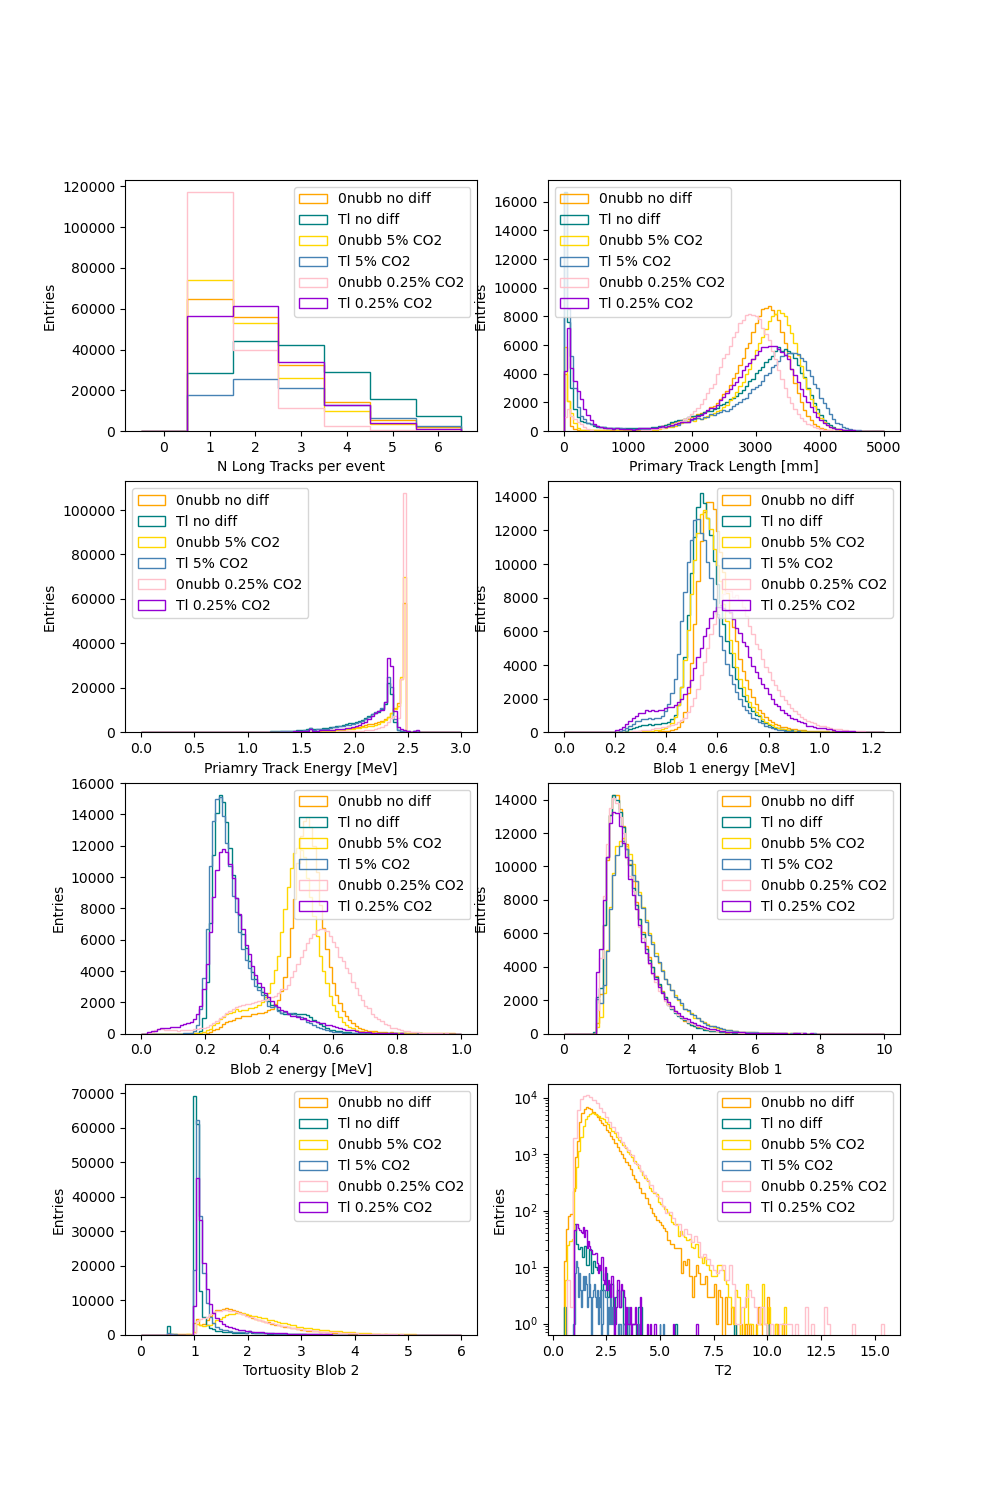

In [31]:
# Plot some variables like number of tracks
%matplotlib widget

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts

fig, axs = plt.subplots(4, 2, figsize=(10, 15))


def PlotDistributions(df_meta, col, label, scale_factor):

    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    weights = np.ones_like(df_counts) * scale_factor

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Long Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()


    df_primary = df_meta[df_meta.primary == 1]

    weights = np.ones_like(df_primary.energy) * scale_factor

    axs[1,0].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Priamry Track Energy [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length [mm]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()

    axs[2,0].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()

    axs[2,1].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Tortuosity Blob 1")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()

    axs[3,0].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Tortuosity Blob 2")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()


    E_cut = 0.43
    axs[3,1].hist(df_primary[ (df_primary.energy>2.4) & (df_primary.event_id.isin(df_counts_evts)) & (df_primary.blob2 > E_cut) ].Tortuosity2, bins = 100, histtype="step", color = col, label = label);
    axs[3,1].set_xlabel("T2")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    axs[3,1].semilogy()

    # nubb_topology_evts = nubb_primary[ (nubb_primary.energy>2.4) & (nubb_primary.event_id.isin(nubb_counts_evts)) & (nubb_primary.blob2 > E_cut) & (nubb_primary.Tortuosity2 > 1.5) ].event_id.unique()
    # Tl_topology_evts = Tl_primary[ (Tl_primary.energy>2.4) & (Tl_primary.event_id.isin(Tl_counts_evts)) & (Tl_primary.blob2 > E_cut) & (Tl_primary.Tortuosity2 > 1.5) ].event_id.unique()


PlotDistributions(nubb_meta, "orange", "0nubb no diff", sf_nubb)
PlotDistributions(Tl_meta, "Teal", "Tl no diff", sf_Tl)
PlotDistributions(nubb_meta_5percent, "gold", "0nubb 5% CO2", sf_nubb_5percent)
PlotDistributions(Tl_meta_5percent, "steelblue", "Tl 5% CO2", sf_Tl_5percent)
PlotDistributions(nubb_meta_025percent, "Pink", "0nubb 0.25% CO2", sf_nubb_025percent)
PlotDistributions(Tl_meta_025percent, "darkviolet", "Tl 0.25% CO2", sf_Tl_025percent)


# print(len(nubb_meta.event_id.unique()), len(nubb_topology_evts), " Eff = ", 100 * len(nubb_topology_evts)/len(nubb_meta.event_id.unique()))
# print(len(Tl_meta.event_id.unique()), len(Tl_topology_evts), " Eff = ", 100 * len(Tl_topology_evts)/len(Tl_meta.event_id.unique()))

# print(Tl_topology_evts) 


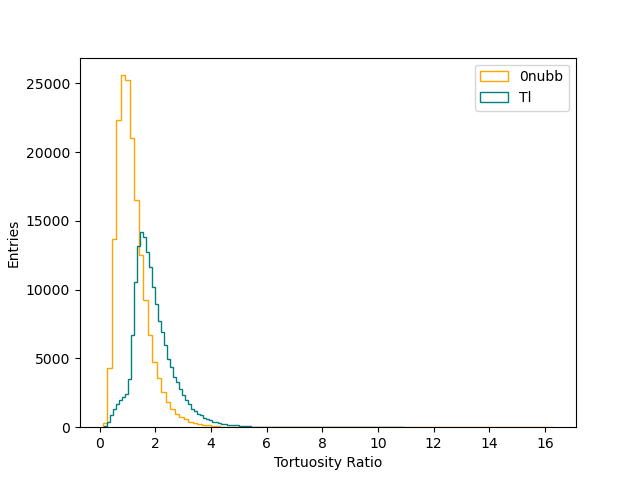

In [85]:
plt.figure()
plt.hist(nubb_primary.Tortuosity1/nubb_primary.Tortuosity2, bins = 100, histtype="step", color = "orange", label = "0nubb");
plt.hist(Tl_primary.Tortuosity1/Tl_primary.Tortuosity2, bins = 100, histtype="step", color = "Teal", label = "Tl");
plt.xlabel("Tortuosity Ratio")
plt.ylabel("Entries")
plt.legend()


In [52]:
# Calculate the tortuosity and add it to the dataframe
def CalcTortuosity2(df_angles):

    # df_angles['distance_diff'] = df_angles.groupby(['event_id', 'trkID'])['cumulative_distance'].diff().fillna(0)

    df_angles["Tortuosity2"] = 1.0

    Tortuosity = []

    window = 5

    for trkID in df_angles.trkID.unique():

        # Get the track
        trk_df = df_angles[df_angles.trkID == trkID]

        # Try to dynamically calculate the window size by splitting into 100 pieces
        window = int(len(trk_df)/100 + 1)
        if window < 5:
            window = 5

        window=10

        # Loop over the nodes in the track
        for index in range(len(trk_df)):

            start = max(0, index - window)  # Prevent going below index 0
            end = min(len(trk_df), index + window + 1)  # Prevent exceeding last index
            
            temp_df = trk_df.iloc[start:end]

            point1 = temp_df.iloc[0]
            point2 = temp_df.iloc[-1]
            segment_length = calculate_distance(point1, point2)

            # Avoids division by zero
            if (segment_length == 0):
                segment_length = 1

            # Get the diff between each row
            cum_distance = 0
            for i in range(1, len(temp_df)):
                
                prev_point = temp_df.iloc[i - 1][['x', 'y', 'z']].to_numpy()
                curr_point = temp_df.iloc[i][['x', 'y', 'z']].to_numpy()
                cum_distance+=euclidean_distance(curr_point,prev_point)

            Tortuosity.append(cum_distance/segment_length)

    df_angles["Tortuosity2"] = Tortuosity

    return df_angles


def GetEndTortuosity2(df, T_threshold):
    df_T1 = df[df.cumulative_distance < T_threshold]
    T1 = df_T1["Tortuosity2"].mean()

    end_threshold = max(df.cumulative_distance) - T_threshold
    df_T2 = df[df['cumulative_distance'] > end_threshold]
    T2 = df_T2["Tortuosity2"].mean()

    if T1 == 0:
        T1 = 1.0
    if T2 == 0:
        T2 = 1.0

    return T1, T2

27192021


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_30908/4165591120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angles["Tortuosity2"] = 1.0


1.1699993776702822 1.9484748486584331


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_30908/4165591120.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angles["Tortuosity2"] = Tortuosity


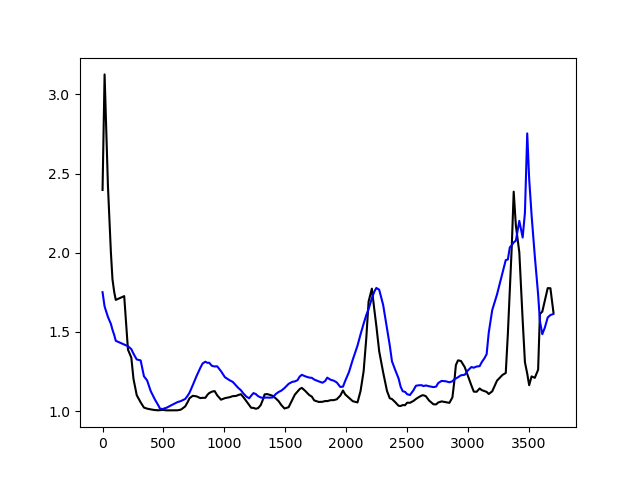

In [53]:
# See if any refinements to the blob and tortuality can be made

event_bkg = Tl_topology_evts[4]
print(event_bkg)

Tl_cuts = Tl[Tl.event_id.isin([event_bkg])]

Tl_cuts = CalcTortuosity2(Tl_cuts)

# display(Tl_cuts)

plt.figure()

T1, T2 = GetEndTortuosity2(Tl_cuts, 500)
print(T1,T2)

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].Tortuosity, color="k");
plt.plot(Tl_cuts[ Tl_cuts.primary == 1 ].cumulative_distance, Tl_cuts[ Tl_cuts.primary == 1 ].Tortuosity2, color="b");
